## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu



# Exploratory Data Analysis


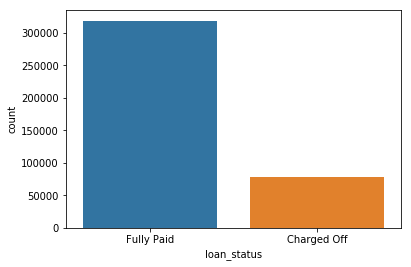

In [9]:
#distribution of our target variable
sns.countplot(x="loan_status",data=df)

`there is class imbalance we have more cases of paid off then charged off `

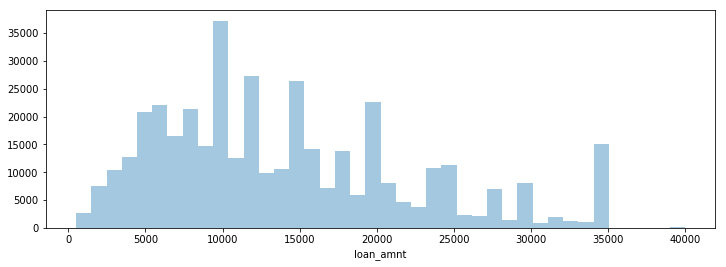

In [10]:
#distribution of loan amount
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"],kde=False,bins=40)

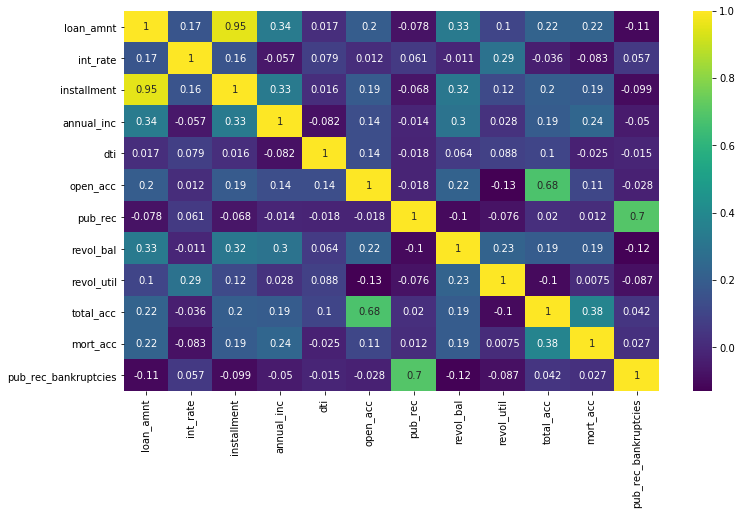

In [223]:
# Visualising correlation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

## Observation

**`Here we can see that loan installment is correlated to to our loan amount and the reason being loan installment is calculated using some kind of formula which is calculated on the loan amount`**

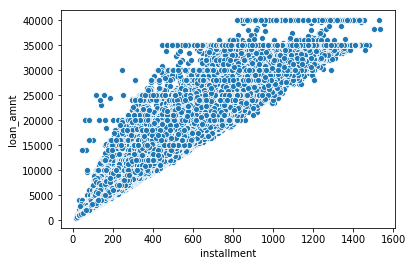

In [12]:
#creating scatter plot of installment and loan amount
sns.scatterplot(x="installment",y="loan_amnt",data=df)

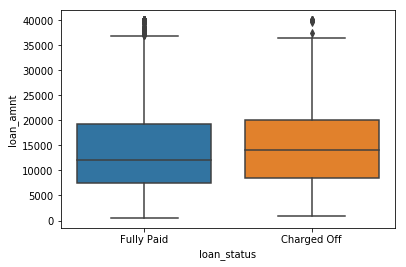

In [13]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

In [226]:
# checking mean value of loan approved 
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


## Observation

**`From above graph and statistics we can say that there is not a much difference between the defaulters when we take loan amount into consideration`**

In [227]:
#checking unique values of grade
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [228]:
#checking unique values for subgrade
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

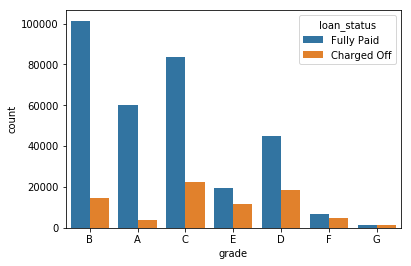

In [229]:
#checking plot for grade
sns.countplot(x="grade",hue="loan_status",data=df)

`here we can see that 

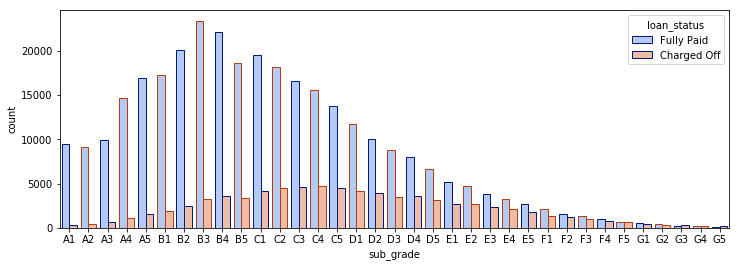

In [230]:
# Creating sub grade plot
plt.figure(figsize=(12,4))
sub_order=sorted(df["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df,order=sub_order,palette="coolwarm",hue="loan_status",
              edgecolor=sns.color_palette("dark", 2))

## Observation

**`It looks like F and G subgrades don't get paid back that often`.**

In [231]:
#replacing fully paid with one and charge off as 0
df["loan_status"]=df["loan_status"].apply(lambda x : 1 if x=="Fully Paid" else 0)

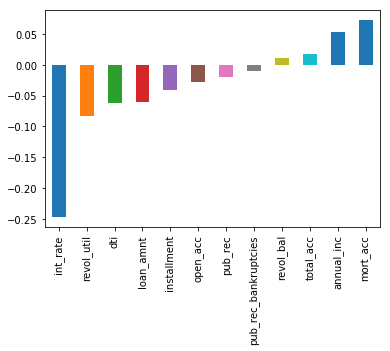

In [232]:
#creating corelation plot
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

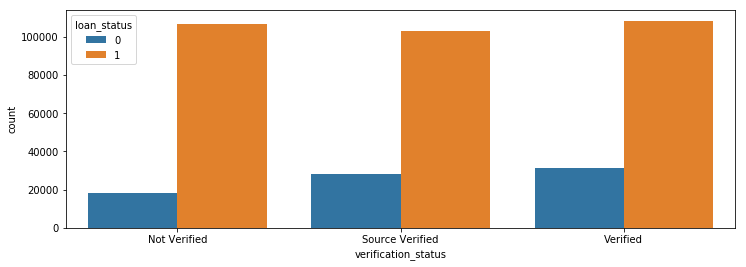

In [233]:
#verification status graph
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df,hue="loan_status")

**`Here we can see a trend that more verified people defaulted than the not verified which questions the autheticity of the verification process of the compnay `**

# Missing Data



In [234]:
#checking missing values in %
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [235]:
df["emp_title"].value_counts()

Teacher                                    4389
Manager                                    4250
Registered Nurse                           1856
RN                                         1846
Supervisor                                 1830
Sales                                      1638
Project Manager                            1505
Owner                                      1410
Driver                                     1339
Office Manager                             1218
manager                                    1145
Director                                   1089
General Manager                            1074
Engineer                                    995
teacher                                     962
driver                                      882
Vice President                              857
Operations Manager                          763
Administrative Assistant                    756
Accountant                                  748
President                               

In [236]:
#dropping the emp title since too many professions are there
df.drop("emp_title",axis=1,inplace=True)

In [237]:
#checking unique values in employ length
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [238]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]


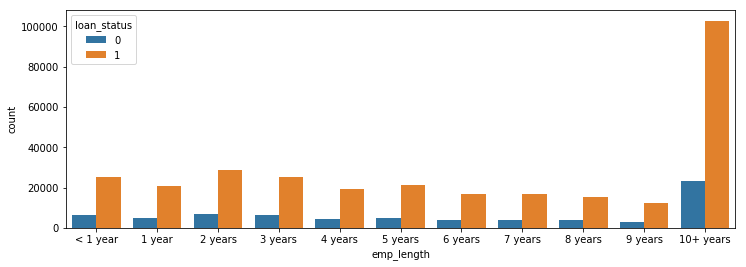

In [239]:
#creating employ length count plot setting hue as loan status
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

In [240]:
#count of people those who didnt pay considering there emp length
emp_co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

#count of people those who did pay considering there emp length
emp_fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]

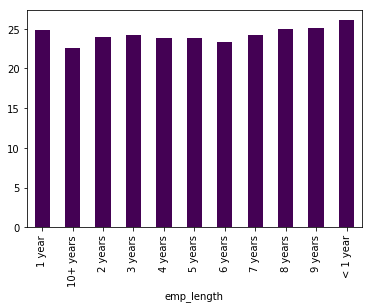

In [241]:
# % of people whoc didnt pay there loan considering there emp length
co_pre=emp_co*100/emp_fp

co_pre.plot(kind="bar",colormap="viridis")

**`Here this is not a very deciding factor whether someone will charged off or not because distribution is somewhat uniform across the employe length`**

In [242]:
#hence dropping emp length
df.drop("emp_length",axis=1,inplace=True)

In [243]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [244]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [245]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [246]:
#since reflecting the same information hence dropping the column
df.drop("title",inplace=True,axis=1)

In [247]:
#mortage accounts count
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [248]:
#filling the mortage value
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_status             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**`Here we can see that mort acc is +vely correlated with total acc and the correlation is not that much high which is a good thing to predict mort_acc using total_acc`**

In [287]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [250]:
#dropping remaining data
df.dropna(inplace=True)

## Categorical Variables and Dummy Variables

In [251]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [252]:
#converting 36 mont to 36 numeric and same for 60
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [253]:
# dropping dropping grade
df.drop("grade",axis=1,inplace=True)

In [254]:
#converting the sub grade into dummy variables
dummies=pd.get_dummies(df["sub_grade"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [255]:
#doing same thing for other categorical variables
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [256]:
#checking the home ownership
df["home_ownership"].value_counts()

MORTGAGE    181592
RENT        141604
OWN          34752
OTHER           34
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [257]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [258]:
#dropping and adding 
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [259]:
#grabbing only last zip code of the address
df["Zip"]=df["address"].apply(lambda x:x[-5:])

In [260]:
#getting value counts to verify whether to convert into dummy or not
df["Zip"].value_counts()

70466    51552
30723    51180
22690    51030
48052    50556
00813    41156
29597    40858
05113    40752
11650    10412
93700    10347
86630    10171
Name: Zip, dtype: int64

In [261]:
#converting into dummy variable
dummies=pd.get_dummies(df["Zip"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("Zip",axis=1),dummies],axis=1)

In [262]:
#dropping address column
df.drop("address",axis=1,inplace=True)

In [263]:
#dropping issue date
df.drop("issue_d",axis=1,inplace=True)

In [264]:
#earliesr cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

## Train Test Split

In [265]:
#sampling the data
data=df.sample(frac=.5,random_state=101)

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data


In [268]:
from sklearn.preprocessing import MinMaxScaler

In [269]:
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Creating the Model


In [270]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

In [290]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

In [272]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 143205 samples, validate on 35802 samples
Epoch 1/25
143205/143205 [==============================] - 33s 229us/sample - loss: 0.3508 - val_loss: 0.2728
Epoch 2/25
143205/143205 [==============================] - 20s 141us/sample - loss: 0.2762 - val_loss: 0.2682
Epoch 3/25
143205/143205 [==============================] - 22s 150us/sample - loss: 0.2706 - val_loss: 0.2670
Epoch 4/25
143205/143205 [==============================] - 21s 145us/sample - loss: 0.2680 - val_loss: 0.2663
Epoch 5/25
143205/143205 [==============================] - 21s 149us/sample - loss: 0.2665 - val_loss: 0.2656
Epoch 6/25
143205/143205 [==============================] - 21s 149us/sample - loss: 0.2657 - val_loss: 0.2659
Epoch 7/25
143205/143205 [==============================] - 23s 157us/sample - loss: 0.2649 - val_loss: 0.2653
Epoch 8/25
143205/143205 [==============================] - 23s 158us/sample - loss: 0.2644 - val_loss: 0.2655
Epoch 9/25
143205/143205 [==============================] - 2

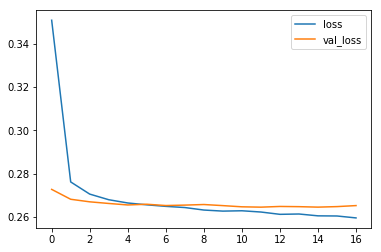

In [273]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [274]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      7286
           1       0.87      1.00      0.93     28516

   micro avg       0.88      0.88      0.88     35802
   macro avg       0.93      0.72      0.77     35802
weighted avg       0.90      0.88      0.87     35802



In [275]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      7286
           1       0.87      1.00      0.93     28516

   micro avg       0.88      0.88      0.88     35802
   macro avg       0.93      0.72      0.77     35802
weighted avg       0.90      0.88      0.87     35802



Here We cannot use accuracy as measure to assess our classifier because our classifier is then taking advantage of the fact that our data is quite skewed. Here we have almost 80% data wo people paid loan and rest didnt pay the loan.

Hence we will use matrics like precision, recall and F1-score and confusion matrix

**`confusion matrix`** - a matrix which tells us how many time our classifier got confused and predicted wrongly

**`Precision`**- The ratio of correct positive predictions to the total predicted positives. Here is this case out of total predicted paid loan how many actually paid the loan

**`Recall`**-Also called Sensitivity, Probability of Detection, True Positive Rate The ratio of correct positive predictions to the total positives examples. in layman term it means out of actual prediction how many times the classifier was correct

**`In Our Case`**
if a loan would default — It would be better to have a high Recall as the banks don’t want to lose money and would be a good idea to alarm the bank even if there is a slight doubt about defaulter.Low precision, in this case, might be okay.





In [276]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,3219,4067
1,55,28461


In [277]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [278]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10)]

In [294]:
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))

In [280]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.96      0.45      0.62      7286
           1       0.88      1.00      0.93     28516

   micro avg       0.89      0.89      0.89     35802
   macro avg       0.92      0.72      0.77     35802
weighted avg       0.89      0.89      0.87     35802

              precision    recall  f1-score   support

           0       0.94      0.46      0.62      7286
           1       0.88      0.99      0.93     28516

   micro avg       0.88      0.88      0.88     35802
   macro avg       0.91      0.73      0.78     35802
weighted avg       0.89      0.88      0.87     35802

              precision    recall  f1-score   support

           0       0.64      0.59      0.62      7286
           1       0.90      0.92      0.91     28516

   micro avg       0.85      0.85      0.85     35802
   macro avg       0.77      0.75      0.76     35802
weighted avg       0.85      0.85      0.85     35802

              preci

## Sampling the data

In [281]:
#creating function which samples equal classes
def sampling_k_elements(group, k=77000):
    if len(group) < k:
        return group
    return group.sample(k)

data = df.groupby('loan_status').apply(sampling_k_elements).reset_index(drop=True)
data=shuffle(data)

In [285]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#scaling the data
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [291]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 119262 samples, validate on 29816 samples
Epoch 1/25
119262/119262 [==============================] - 31s 259us/sample - loss: 0.4580 - val_loss: 0.3665
Epoch 2/25
119262/119262 [==============================] - 19s 163us/sample - loss: 0.3742 - val_loss: 0.3596
Epoch 3/25
119262/119262 [==============================] - 23s 190us/sample - loss: 0.3674 - val_loss: 0.3592
Epoch 4/25
119262/119262 [==============================] - 22s 186us/sample - loss: 0.3651 - val_loss: 0.3573
Epoch 5/25
119262/119262 [==============================] - 22s 184us/sample - loss: 0.3637 - val_loss: 0.3575
Epoch 6/25
119262/119262 [==============================] - 24s 205us/sample - loss: 0.3624 - val_loss: 0.3570
Epoch 7/25
119262/119262 [==============================] - 26s 221us/sample - loss: 0.3617 - val_loss: 0.3569
Epoch 8/25
119262/119262 [==============================] - 25s 213us/sample - loss: 0.3611 - val_loss: 0.3562
Epoch 9/25
119262/119262 [==============================] - 2

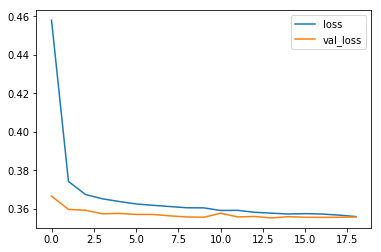

In [292]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [293]:
predict=model.predict_classes(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     14453
           1       0.80      0.82      0.81     15363

   micro avg       0.80      0.80      0.80     29816
   macro avg       0.80      0.80      0.80     29816
weighted avg       0.80      0.80      0.80     29816



In [295]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     14453
           1       0.81      0.81      0.81     15363

   micro avg       0.81      0.81      0.81     29816
   macro avg       0.81      0.81      0.81     29816
weighted avg       0.81      0.81      0.81     29816

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     14453
           1       0.81      0.81      0.81     15363

   micro avg       0.81      0.81      0.81     29816
   macro avg       0.81      0.81      0.81     29816
weighted avg       0.81      0.81      0.81     29816

              precision    recall  f1-score   support

           0       0.89      0.57      0.69     14453
           1       0.70      0.94      0.80     15363

   micro avg       0.76      0.76      0.76     29816
   macro avg       0.80      0.75      0.75     29816
weighted avg       0.79      0.76      0.75     29816

              preci